### Dynamical Movement Primitives - Learning Attractor Models for Motor Behaviors
1. Given the model of an attractor:
<br> $\tau \dot z = \alpha_z (\beta_z (g-y)-z) + f$
<br> $\tau \dot y = z$
where $\tau$ is the time constant and $\alpha_z, \beta_z > 0$. When this system is unforced, it is a globally stable system with the unique point attractor located at $(z,y)=(0,g)$. To critically damp the system, $\beta_z = \alpha_z/4$ in order for $y$ to monotonically converge to $g$
2. The forcing function $f$ can be chosen such that $f=\frac{\sum^N_i \psi_i(t) w_i}{\sum^N_i \psi_i(t)}$, allowing easy description of forcing function through a function approximator. The explicit time dependence of this nonlinearity, however, creates a non-autonomous dynamics system.
3. To ensure stabilty, we replace time by a first-order linear dynamical system $\tau \dot x = -\alpha_x x$. This systems starts with $x_0 = 1$ and converges monotonically to 0. We call $x$ the phase variable and the equation the *canonical system*. Now that the time dependency is gone, we have obtained an autonomous system. The forcing term can be reformulated to $f(x)=\frac{\sum^N_i \psi_i(x) w_i}{\sum^N_i \psi_i(x)} x(g-y_0)$ with $N$ exponential basis functions $\psi_i(x)$ where $\psi_i(x) = e^{-\frac{1}{2\sigma_i^2}(x-c_i)^2}$. The forcing function is modulated by both $g-y_0$ and $x$. The former leads to proper scaling while the latter ensures that the forcing term vanishes eventually.

### Properties
1. Stability properties of the system can be proven easily since the attractor is none other than an LTI mass spring damper system.
2. Invariance properties of the system can easily assessed from the spatial and temporal scaling

### Learning
1. For function approximation, we re-arrange the equation as $\tau \dot z - \alpha_z (\beta_z (g-y)-z)=f$. Re-expressing this equation as a forcing term, we have $f_{target} = \tau^2 \ddot y_{demo} - \alpha_z (\beta_z(g-y_{demo}) - \tau \dot y_{demo})$
2. LWR can be used here to learn the kernels. It is a fast one-shot learning procedure and thus suitable for run-time learning. The cost function to be minimized for $\psi_i$ (corresponding to $w_i$) is $J_i = \sum_{t=0}^P \psi_i(t)(f_{target}(t) - w_i \xi(t))^2$ where $\xi(t) = x(t) (g-y_0)$ giving the solution $w_i = \frac{s^T \Gamma_i f_{target}}{s^T \Gamma_i s}$ where $s = [ \xi(1)~...~\xi(P)]^T$, $\Gamma_i = diag([\psi_i(1)~...~\psi_i(P)])$ and $f_{target}=[f_{target}(1)~...~f_{target}(P)]$

### Spatial and temporal coupling
1. Coupling terms can be added at the canonical or transformation system to incorporate interesting behaviors
2. Spatial coupling can be added as:
<br> $\tau \dot z = \alpha_z (\beta_z (g-y) - z) + f + C_t$
<br> $\tau \dot y = z$
The coupling term $C_t$ acts on the transformation system and affects the spatial evolution $(y,\dot y, \ddot y)$ and *less* the temporal evolution. An example would be to use a potential field as $C_t$ for obstacle avoidance.
3. Temporal coupling can be added as:
<br> $\tau \dot x = -\alpha_x + C_c$
The coupling term $C_c$ only affects the temporal evolution of our dynamical system without affecting the spatial behavior
4. Spatial and temporal coupling can be added to mitigate issues of open loop tracking of DMPs. The error between the actual system coordinates $y_a$ and the dmp output $y$ is first passed through a low pass filter forming $\dot e = \alpha_e (y_a - y - e)$. Now, with the error signal $e$, we add:
<br> A spatial coupling $C_t = k_t e$ that hinders the output of the dmp from evolving too far away. This term can be interpreted as a spring pulling back the dmp output.
<br> An adjustment to the time constant $\tau = 1 + k_t e^2$ where we slow down all differential equations of the dynamical system

### Obstacle avoidance
1. Since we are operating on force couplings on the transformation system, additional coupling can be added. One possible addition is to use a potential field

### Notes on dmpbbo library
1. A dynamical system is designed to be modulated by the forcing term. With the forcing term, we cannot guarantee that the output of the system $y$ converges to the goal $y_g$; perhaps the term continually pushes the system away. To ensure convergence of the forcing term, we need to guarantee that the forcing term decreases to $0$. To do so, a **gating** term based on the canonical system that converges to $0$ is used
2. The introduction of a time-dependent forcing term $f(t)$ makes the overall system non-autonomous. To achieve time-independence, we therefore let $f$ be a function of the state of the canonical system, i.e. $f(x)$
3. DMP:
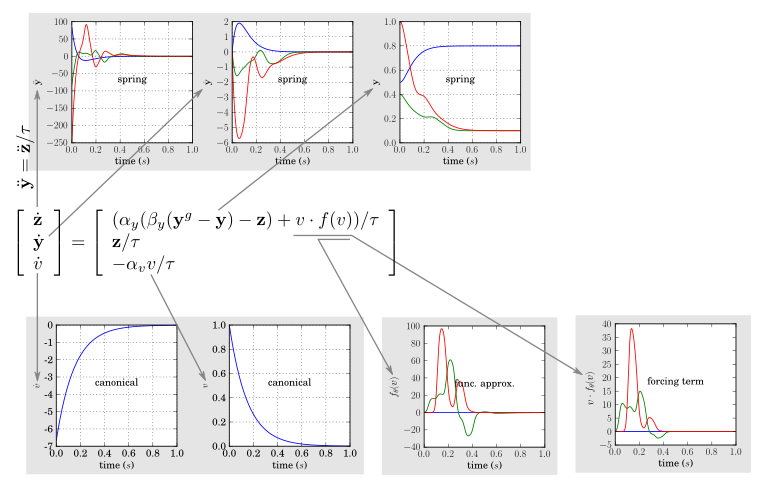